In [1]:
import os
import json
import datetime
import warnings
import polars as pl
import pandas as pd
import altair as alt

from src.najdi_rok import najdi_rok
from src.pocet_stran import pocet_stran
from src.bez_bordelu import bez_bordelu
from src.alt_friendly import alt_friendly
from src.hezke_jmeno import hezke_jmeno
from src.kristi_promin import kristi_promin
from src.zjisti_vazbu import zjisti_vazbu
from src.me_to_neurazi import me_to_neurazi

pl.Config(tbl_rows=100)
alt.data_transformers.disable_max_rows()
alt.themes.register('irozhlas', kristi_promin)
alt.themes.enable('irozhlas')
warnings.filterwarnings('ignore')

with open(os.path.join('src','kredity.json'), 'r', encoding='utf-8') as kredity:
    kredity = json.loads(kredity.read())

In [2]:
df = pd.read_parquet(os.path.join("data","cnb_vyber.parquet"))
df = df.explode('008')
df['rok'] = df['008'].apply(lambda x: najdi_rok(x))
df['stran'] = df['300_a'].apply(lambda x: pocet_stran(x))

In [3]:
df = df.dropna(subset=['245_a','100_a','rok'])

In [4]:
df = df[df['stran'] >= 30]

In [5]:
df = df.explode('260_b').explode('264_b')

In [6]:
def dvoje_nakladatelstvi(sedesat, sedesatctyri):
    if sedesat != None:
        return sedesat.replace(',','').replace(":",'').strip()
    elif sedesatctyri != None:
        return sedesatctyri.replace(',','').replace(":",'').strip()
    else:
        return None

In [7]:
df['nakladatel'] = df.apply(lambda row: dvoje_nakladatelstvi(row['260_b'], row['264_b']), axis=1)

In [8]:
df[(df['rok'] == 2021) & (df['nakladatel'].isnull())]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
cpk20243582322,220106t20212021xr a f 010 0 cze d,[978-80-01-06880-9],None,[(brožováno)],"[cze, eng]",[cze],1,None,[72],[Architektura],...,[kn20010710176],[České vysoké učení technické v Praze.],[Fakulta architektury],None,None,None,cam a22 i 4500,2021.0,179.0,None
nkc20193147778,210527t20212021xr e 000 0 cze d,[978-80-270-6918-7],None,[(brožováno)],[cze],[eng],1,None,[615],[Farmacie. Farmakologie],...,None,None,None,None,None,None,nam a22 i 4500,2021.0,134.0,None
nkc20203174146,191104t20212021xr a a 000 j cze d,[978-80-7292-384-7],[349.00 Kč],[(vázáno) :],[cze],[fre],1,None,"[78.03, 0/9-053.2]","[Hudební styly, vlivy, školy, Literatura pro d...",...,None,None,None,[Zvuková knížka (Axióma)],None,None,cam a22 i 4500,2021.0,30.0,None
nkc20203239905,200727t20212021xr ab e 000 0 cze,[978-80-270-8145-5],None,[(vázáno)],None,None,None,None,[908(437)],[Vlastivěda Česka a Slovenska],...,None,None,None,None,None,None,nam a22 i 4500,2021.0,165.0,None
nkc20203241808,200811t20212021xr f 000 0 cze,[978-80-906325-5-4],None,[(brožováno)],None,None,None,None,[2],[Náboženství],...,None,None,None,None,[Granite Design - Akbar],None,nam a22 i 4500,2021.0,305.0,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243606473,240517t20212021xr a e f 000 0 cze,[978-80-908458-2-4],None,[(kroužková vazba)],None,None,None,None,[616.89],[Psychiatrie],...,None,None,None,None,None,None,nam a22 i 4500,2021.0,116.0,None
nkc20243606474,240517t20212021xr a e f 000 0 cze,[978-80-908458-3-1],None,[(kroužková vazba)],None,None,None,None,[649],"[Domácí péče o děti, nemocné a hosty]",...,None,None,None,None,None,None,nam a22 i 4500,2021.0,99.0,None
nkc20243606474,240517t20212021xr a e f 000 0 cze,[978-80-908458-3-1],None,[(kroužková vazba)],None,None,None,None,[649],"[Domácí péče o děti, nemocné a hosty]",...,None,None,None,None,None,None,nam a22 i 4500,2021.0,99.0,None


In [9]:
df[df['nakladatel'].notnull()].groupby('rok').size() / df.groupby('rok').size()

rok
1900.0    1.000000
1901.0    1.000000
1902.0    0.999293
1903.0    0.999237
1904.0    1.000000
            ...   
2021.0    0.924087
2022.0    0.930183
2023.0    0.927482
2024.0    0.930929
2025.0    0.945205
Length: 126, dtype: float64

In [10]:
df['nakladatel'].sample(50)

001
cpk20031243680                                                 Maťa
nkc20233492078                                Rebo International CZ
cpk20031200794                               Knihkupectví U radnice
cpk20112266191                                           I.L. Kober
cpk19950110936                                              Rovnost
bk197403953                                                 Svoboda
nkc20112268128                      Výzkumný ústav rostlinné výroby
nkc20193087461                                                Grada
bk198200293                                                   Práce
bk195701935                                                    SNTL
nkc20071709526                                            Karolinum
nkc20112253254      Ostravská univerzita v Ostravě Lékařská fakulta
nkc20122397901    Koordinační centrum česko-německých výměn mlád...
cpk20041409862                                                 Argo
nkc20152702615                              

In [11]:
df[df['100_7'].astype(str).str.contains('jx20100301005',na=False)]

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
nkc20182997195,180516s2018 xr g 000 j cze,[978-80-7549-850-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,[Euromedia Group - Listen],None,nam a22 i 4500,2018.0,156.0,Euromedia
nkc20233549616,230925s2023 xr g 000 f cze,[978-80-7637-400-3],None,[(brožováno)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 i 4500,2023.0,183.0,Paseka


In [12]:
df[df['nakladatel'] == 'Listen'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
cpk19970277303,980429s1997 xr c e 000 mdcze,[80-902360-0-6],None,[(brož.)],None,None,None,None,[394],[Veřejný a společenský život. Každodenní život],...,None,None,None,None,None,None,nam a22 a 4500,1997.0,173.0,Listen
cpk19980318422,980518s1998 xr c e 000 m cze,[80-902360-1-4],None,[(váz.)],None,None,None,None,[316.4/.7],[Sociální interakce. Sociální komunikace],...,None,None,None,None,None,None,nam a22 a 4500,1998.0,111.0,Listen
cpk19990738645,990927s1999 xr acf e 000 macze,[80-902360-2-2],None,[(váz.)],None,None,None,None,"[7.01/.09, 929]","[Umění, Biografie]",...,None,None,None,None,None,None,nam a22 a 4500,1999.0,117.0,Listen
cpk20000703085,000505s2000 xr af e 000 macze,[80-902360-3-0],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,cam a22 a 4500,2000.0,127.0,Listen
cpk20000980115,010201s2000 xr ac e 000 mdcze,[80-902360-4-9],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,nam a22 a 4500,2000.0,133.0,Listen
cpk20000985749,010216s2000 xr a e 000 macze,[80-902360-5-7],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,nam a22 a 4500,2000.0,117.0,Listen
cpk20021186037,021125s2002 xr c e 000 0ccze,[80-86526-00-3],None,[(váz.)],None,None,None,None,[929.5/.9],[Genealogie. Heraldika. Šlechta. Vlajky],...,None,None,None,None,None,None,nam a22 a 4500,2002.0,141.0,Listen
cpk20031190707,030721s2002 xr c e 000 macze,[80-86526-01-1],None,[(váz.)],None,None,None,None,[929],[Biografie],...,None,None,None,None,None,None,nam a22 a 4500,2002.0,188.0,Listen
cpk20031244955,030819s2002 xr e 000 1 cze,[80-86526-02-X],None,[(váz.)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 a 4500,2002.0,254.0,Listen


In [13]:
df[df['nakladatel'] == 'Paseka'].sort_values(by='rok')

,008,020_a,020_c,020_q,041_a,041_h,041_ind1,044_a,072_a,072_x,...,710_7,710_a,710_b,830_a,928_a,964_a,leader,rok,stran,nakladatel
001,,,,,,,,,,,,,,,,,,,,,
ck9104408,911009s1990 xr a e 000 f cze,[80-85192-01-2],None,[(vázáno)],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,"[Klíma, Ladislav (spisovatel a filozof čes., 1...",nam a22 i 4500,1990.0,203.0,Paseka
cpk20000533892,910220s1990 xr ac e 001 0 cze,[80-85192-03-9],"[Kčs 39,00]",[(váz.) :],None,None,None,None,[641],[Kuchařství. Potraviny. Vařená jídla],...,None,None,None,None,None,None,nam a22 a 4500,1990.0,330.0,Paseka
nkc20070535080,920805s1990 xr a g 000 f cze,[80-85192-05-5],"[Kčs 24,00]",[(váz.) :],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 a 4500,1990.0,101.0,Paseka
np9433293,950103s1990 xr a g 000 f cze,[80-85192-00-4],"[Kčs 37,00]",[(vázáno) :],None,None,None,None,[821.162.3-3],[Česká próza],...,None,None,None,None,None,None,nam a22 i 4500,1990.0,318.0,Paseka
ck9104917,910924s1991 xr a g 000 j cze,[80-85192-07-1],"[Kčs 35,00]",[(váz.) :],None,None,None,None,[821-31/-34],"[Milostná, dobrodružná, fantastická próza]",...,None,None,None,None,None,None,nam a22 a 4500,1991.0,159.0,Paseka
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nkc20243628719,240830s2024 xr a a 000 j cze,[978-80-7637-486-7],None,[(vázáno)],[cze],[lit],1,None,"[821.17, 821-93]","[Baltské literatury, Literatura pro děti a mlá...",...,None,None,None,None,None,None,nam a22 i 4500,2024.0,48.0,Paseka
nkc20243627155,240819s2024 xr g 000 f cze,[978-80-7637-491-1],None,[(vázáno)],[cze],[rus],1,None,[821.161.1],"[Ruská literatura, rusky psaná]",...,None,None,None,None,None,None,nam a22 i 4500,2024.0,194.0,Paseka
nkc20243631758,240916s2024 xr g 000 f cze,[978-80-7637-517-8],None,[(vázáno)],[cze],[fre],1,None,[821.133.1-3],"[Francouzská próza, francouzsky psaná]",...,None,None,None,None,None,None,nam a22 i 4500,2024.0,331.0,Paseka


## Nejproduktivnější nakladatelství

In [15]:
df.groupby('nakladatel').size().nlargest(60)

nakladatel
SPN                                  21683
SNTL                                 13084
MOBA                                  9348
Mladá fronta                          7820
Albatros                              6883
Československý spisovatel             6053
Grada                                 5962
Práce                                 5362
Naše vojsko                           5255
Orbis                                 4960
Knižní klub                           4882
ČVUT                                  4693
Dilia                                 4625
Ikar                                  4569
Ivo Železný                           4422
Odeon                                 4088
Státní pedagogické nakladatelství     4021
Academia                              3963
Svoboda                               3806
Fragment                              3761
Argo                                  3601
Portál                                3331
Computer Press                        3189


In [16]:
df[df['rok'] > 2013].groupby('nakladatel').size().nlargest(60)

nakladatel
MOBA                                           3830
Euromedia Group                                2673
Dobrovský s.r.o.                               2372
Argo                                           1941
Fragment                                       1936
CPress                                         1840
Ikar                                           1686
Albatros                                       1611
Host                                           1340
Mladá fronta                                   1334
Grada                                          1246
Portál                                         1177
Knižní klub                                    1112
Grada Publishing                               1056
Nová Forma                                     1000
Wolters Kluwer                                  917
Univerzita Palackého v Olomouci                 890
Academia                                        881
Baronet                                         871
C

## Počet jednotlivých nakladatelství

<Axes: xlabel='rok'>

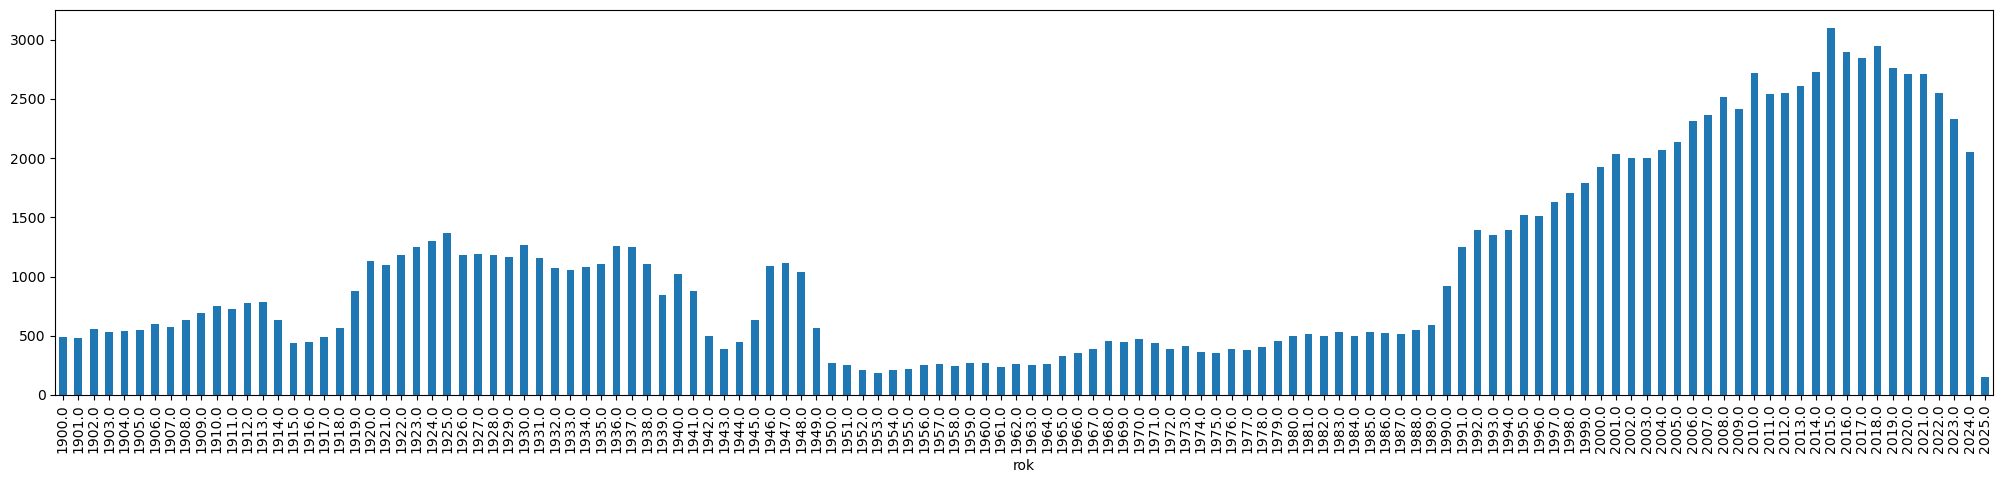

In [18]:
df.groupby('rok')['nakladatel'].nunique().plot.bar(figsize=(25,5))

In [19]:
df.groupby('rok')['nakladatel'].nunique().nlargest()

rok
2015.0    3096
2018.0    2945
2016.0    2897
2017.0    2845
2019.0    2758
Name: nakladatel, dtype: int64

In [20]:
df[df['rok'] == 1953].groupby('nakladatel').size().nlargest(15)

nakladatel
SPN                                           576
SNTL                                          317
Orbis                                         210
Práce                                         189
Československý spisovatel                     170
Naše vojsko                                   147
SZN                                           125
Nakladatelství Československé akademie věd    121
Státní pedagogické nakladatelství             119
SNKLHU                                        111
ČDLJ                                          111
SNDK                                           98
SZdN                                           87
Mladá fronta                                   86
SNPL                                           77
dtype: int64

## Počet nových nakladatelství

<Axes: xlabel='rok'>

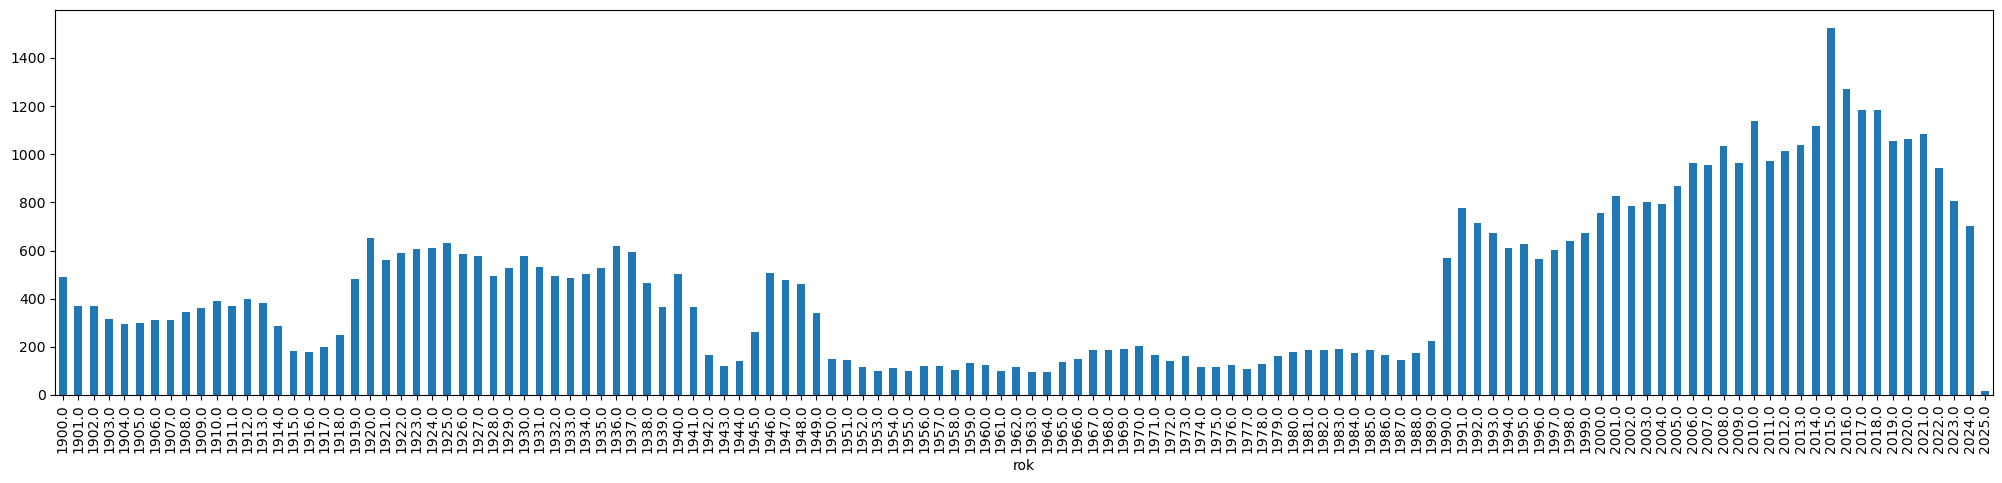

In [22]:
pd.DataFrame(df.groupby('nakladatel')['rok'].min()).groupby('rok').size().plot.bar(figsize=(25,5))

## Počet končících nakladatelství

<Axes: xlabel='rok'>

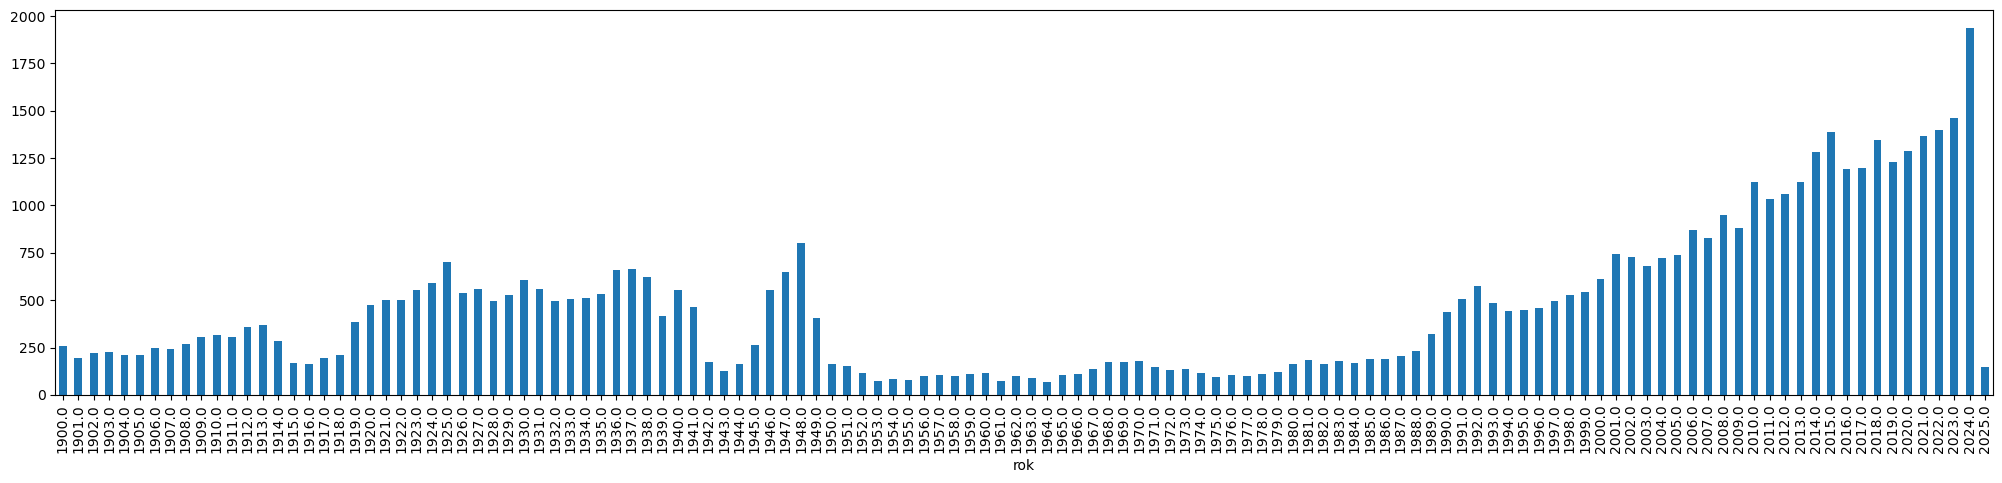

In [24]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

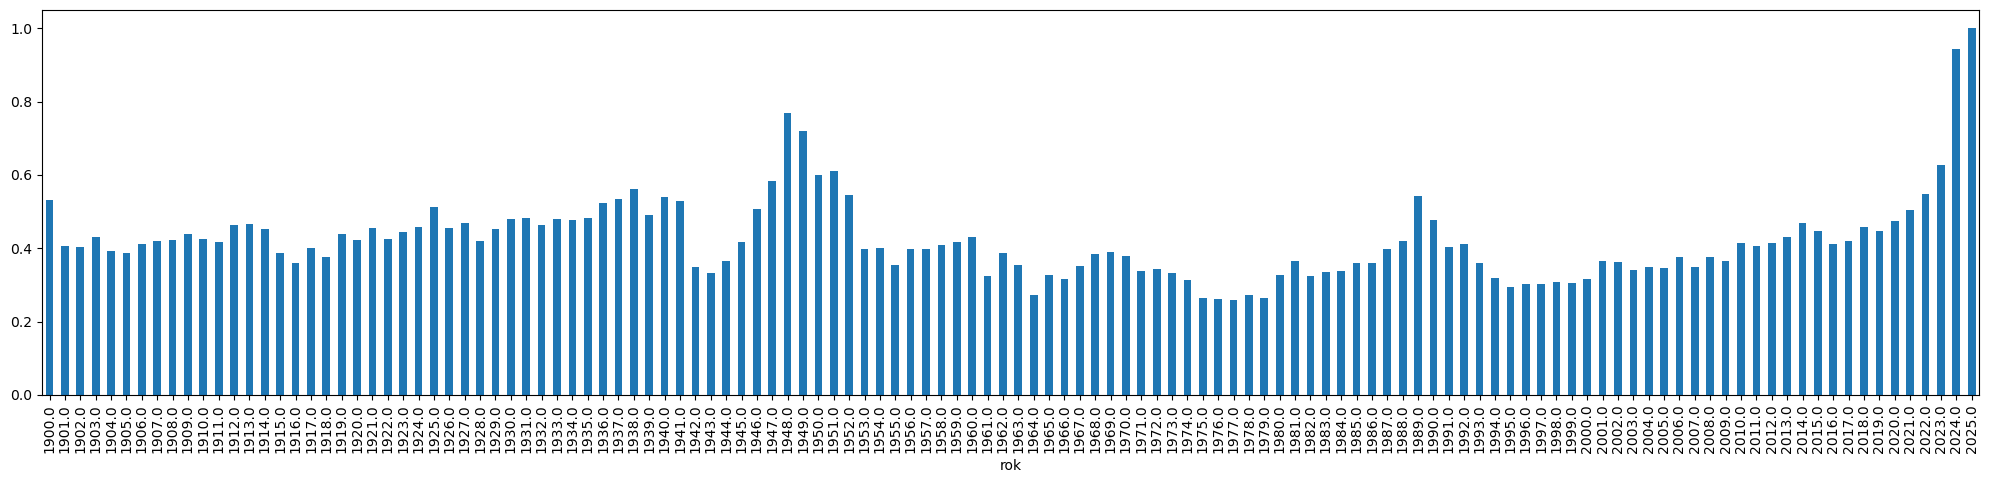

In [25]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).plot.bar(figsize=(25,5))

In [26]:
(pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size() / df.groupby('rok')['nakladatel'].nunique()).nlargest(10)

rok
2025.0    1.000000
2024.0    0.942523
1948.0    0.769231
1949.0    0.719577
2023.0    0.626930
1951.0    0.609562
1950.0    0.600733
1947.0    0.583483
1938.0    0.561594
2022.0    0.546808
dtype: float64

In [27]:
pd.DataFrame(df[df['rok'] < 1990].groupby('nakladatel')['rok'].max()).groupby('rok').size().nlargest(5)

rok
1948.0    826
1925.0    708
1937.0    683
1947.0    672
1936.0    665
dtype: int64

In [28]:
pd.DataFrame(df.groupby('nakladatel')['rok'].max()).groupby('rok').size()

rok
1900.0     261
1901.0     197
1902.0     223
1903.0     227
1904.0     212
          ... 
2021.0    1369
2022.0    1396
2023.0    1462
2024.0    1935
2025.0     148
Length: 126, dtype: int64

## Grafy

In [30]:
import altair as alt

In [31]:
nakladatelstvi_s_tremi_knihami = df.groupby("nakladatel").size()
nakladatelstvi_s_tremi_knihami = nakladatelstvi_s_tremi_knihami[nakladatelstvi_s_tremi_knihami >= 3].index.to_list()
df_aspon_tri = df[df['nakladatel'].isin(nakladatelstvi_s_tremi_knihami)]

In [171]:
jednotliva = pd.DataFrame(df_aspon_tri.groupby('rok')['nakladatel'].nunique()).reset_index().rename(columns={"nakladatel": "Celkem"})
nova = pd.DataFrame(df_aspon_tri.groupby('nakladatel')['rok'].min()).groupby('rok').size().reset_index().rename(columns={0: "Nová"})
koncici = pd.DataFrame(df_aspon_tri.groupby('nakladatel')['rok'].max()).groupby('rok').size().reset_index().rename(columns={0: "Končící"})
do_grafu = jednotliva.merge(nova, on="rok", how="left")
do_grafu = do_grafu.merge(koncici, on="rok", how="left")
do_grafu = do_grafu.melt(id_vars="rok")
do_grafu = do_grafu[do_grafu['rok'] >= 1900]
do_grafu = do_grafu[((do_grafu['rok'] <= 2020) & (do_grafu['variable'].isin(['Celkem','Nová'])) | ((do_grafu['rok'] <= 2010) & (do_grafu['variable'] == 'Končící')))]
do_grafu['rok'] = pd.to_datetime(do_grafu['rok'].apply(lambda x: f"{int(x)}-01-01"))
do_grafu

,rok,variable,value
0,1900-01-01,Celkem,197.0
1,1901-01-01,Celkem,255.0
2,1902-01-01,Celkem,302.0
3,1903-01-01,Celkem,289.0
4,1904-01-01,Celkem,302.0
...,...,...,...
358,2006-01-01,Končící,149.0
359,2007-01-01,Končící,146.0
360,2008-01-01,Končící,168.0
361,2009-01-01,Končící,166.0


In [143]:
alt.Chart(do_grafu).mark_line().encode(
    x='rok:T',
    y='value:Q',
    color='variable:N',
)

alt.Chart(...)

In [34]:
from textwrap import wrap

In [101]:
titulek='Kolik různých nakladatelství vydávalo knihy'
podtitulek="Nejhůř poznamenaly pestrost nakladatelské scény nacistická okupace a komunistický režim. Do grafu se promítají pouze nakladatelství tří a více knih."
podtitulek=wrap(podtitulek, 60)

In [179]:
graf_nakl = alt.Chart(
    do_grafu, title=alt.Title(titulek,subtitle=['Historicky nejpestřejší je nakladatelská scéna v současnosti,','následovaná obdobím první republiky. Vývoj končících',
                               'nakladatelství zobrazujeme jen do roku 2010, po něm','už je zkreslený (směrem nahoru) pauzujícími nakladateli.']), 
    width=300
).mark_bar(width=2).encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('value:Q', 
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6', orient='right', format='~s'), 
          title=None
    ),
    alt.Color("variable:N", 
              scale=alt.Scale(range=['#D55F50', '#ECD410', '#9CA545']), ##['#DB842F', '#81A9D5', '#E09DA3']), ## '# ['#a7ddd6','#001f80','#e6e6e4','#e5db00','#e49996','#9cc002']), 
              title=None, 
              legend=None
    ),
    row=alt.Row(
        "variable:N", 
        title=None, 
        spacing=15, 
        header=alt.Header(labelAngle=0, labelAlign='left', labelAnchor='start', labelFontWeight=500, labelFont='Asap', labelOrient="top"),
                sort=['Celkem', 'Nová', 'Končící'],

    )
).resolve_axis(
    x='independent'
).resolve_scale(
    y='independent'
).properties(height=60, width=250).configure_view(stroke='transparent').configure_view(stroke='transparent').configure_axis(grid=False, domain=False)

graf_nakl

alt.Chart(...)

In [181]:
me_to_neurazi(graf_nakl, soubor="01_nakladatelstvi_pocty", kredity=kredity['default'])

<figure><a href="https://data.irozhlas.cz/knihy-grafy/01_nakladatelstvi_pocty.svg" target="_blank"><img src="https://data.irozhlas.cz/knihy-grafy/01_nakladatelstvi_pocty.svg" width="100%" alt="Graf s titulkem „Kolik různých nakladatelství vydávalo knihy“. Další texty by měly být čitelné ze zdrojového souboru SVG." /></a></figure>
<figure><a href="https://michalkasparek.cz/sklad/01_nakladatelstvi_pocty.svg" target="_blank"><img src="https://michalkasparek.cz/sklad/01_nakladatelstvi_pocty.svg" width="100%" alt="Graf s titulkem „Kolik různých nakladatelství vydávalo knihy“. Další texty by měly být čitelné ze zdrojového souboru SVG." /></a></figure>


In [38]:
import polars as pl

### Podíl největšího

In [40]:
nakl = df.groupby(["nakladatel","rok"]).size().reset_index().rename(columns={0: 'knih'})
knih_za_rok = nakl.groupby("rok")["knih"].sum().reset_index().rename(columns={'knih': 'celkem'})
nakl = nakl.merge(knih_za_rok, on="rok", how="left")
nakl['podíl'] = nakl['knih'] / nakl['celkem']
nakl

,nakladatel,rok,knih,celkem,podíl
0,"""Ars"" Doležal & Steinbrener",1944.0,2,1718,0.001164
1,"""Cíl""",1948.0,1,3680,0.000272
2,"""Dillia"" Čs. divadelní a literární jednatelství",1958.0,1,3450,0.000290
3,"""Domov""",1942.0,1,1766,0.000566
4,"""G""",1992.0,1,6054,0.000165
...,...,...,...,...,...
134413,Žár - Dušan Žárský,2021.0,1,11053,0.000090
134414,Žďár,1932.0,1,2903,0.000344
134415,Žďárské strojírny a slévárny,1971.0,1,3640,0.000275
134416,Žďárský,1920.0,1,2904,0.000344


In [41]:
str(nakl.sample(8))

'                                               nakladatel     rok  knih  \\\n53941                         Mendelova Univerzita v Brně  2024.0     1   \n90538               Sportovní a turistické nakladatelství  1961.0    12   \n61101                     Městské muzeum v Železném Brodě  2023.0     1   \n120110         nákladem hlavního velitelství Armády spásy  1925.0     1   \n4392                                Alois Hynek knihkupec  1928.0     2   \n7437                                              Auricon  2019.0     2   \n8975                                Barrister & Principal  2023.0     2   \n84659   SNTL - Státní nakladatelství technické literatury  1984.0     1   \n\n        celkem     podíl  \n53941     9421  0.000106  \n90538     3739  0.003209  \n61101    10155  0.000098  \n120110    3528  0.000283  \n4392      3325  0.000602  \n7437     11622  0.000172  \n8975     10155  0.000197  \n84659     4398  0.000227  '

In [42]:
nakl.sort_values(by='podíl', ascending=False)

,nakladatel,rok,knih,celkem,podíl
72262,Orbis,1943.0,316,1485,0.212795
84812,SPN,1960.0,753,3685,0.204342
84817,SPN,1965.0,670,3395,0.197349
84814,SPN,1962.0,679,3526,0.192569
84813,SPN,1961.0,699,3739,0.186948
...,...,...,...,...,...
101561,Univerzita Palackého v Olomouci Katedra psycho...,2015.0,1,12219,0.000082
10149,Bodyart Press s.r.o,2015.0,1,12219,0.000082
75822,Petr Kos,2015.0,1,12219,0.000082
101563,Univerzita Palackého v Olomouci Lékařská fakulta,2015.0,1,12219,0.000082


In [43]:
samonaklad = ['nákladem vlastním','nákl. vlast.','nákl. vl.']

In [44]:
result = nakl[~nakl['nakladatel'].isin(samonaklad)].sort_values(['rok', 'podíl'], ascending=[True, False]).drop_duplicates('rok')
print(result)
result = result[result['rok'].isin(range(1900,2024))]
result['rok'] = pd.to_datetime(result['rok'].apply(lambda x: f"{int(x)}-01-01"))
result = result.replace({'IŽ': 'Železný','Ivo Železný':'Železný','Euromedia Group':'Euromedia'})
nejcastejsi = result.groupby('nakladatel').size() 
print(nejcastejsi.nlargest(15))
nejcastejsi = nejcastejsi[nejcastejsi >=4 ].index.to_list()
print(nejcastejsi)
nejcastejsi=['SPN','MOBA','Železný','Euromedia','Orbis']
nenahrazeni = {x : x for x in nejcastejsi}
print(nenahrazeni)
result = pl.from_pandas(result).with_columns(pl.col('nakladatel').replace_strict(nenahrazeni, default='ostatní')).to_pandas()
result

            nakladatel     rok  knih  celkem     podíl
33241          J. Otto  1900.0    35    1019  0.034347
33242          J. Otto  1901.0    61    1198  0.050918
33243          J. Otto  1902.0    85    1413  0.060156
33244          J. Otto  1903.0    80    1309  0.061115
33245          J. Otto  1904.0    55    1242  0.044283
...                ...     ...   ...     ...       ...
20469  Euromedia Group  2021.0   438   11053  0.039627
20470  Euromedia Group  2022.0   425   11378  0.037353
20471  Euromedia Group  2023.0   464   10155  0.045692
20472  Euromedia Group  2024.0   414    9421  0.043944
51155             MOBA  2025.0    32     414  0.077295

[126 rows x 5 columns]
nakladatel
SPN                      36
J. Otto                  16
MOBA                     13
Jos. R. Vilímek           9
Železný                   9
Orbis                     6
Euromedia                 5
Unie                      4
B. Kočí                   3
SNTL                      3
Fr. Borový               

,nakladatel,rok,knih,celkem,podíl
0,ostatní,1900-01-01,35,1019,0.034347
1,ostatní,1901-01-01,61,1198,0.050918
2,ostatní,1902-01-01,85,1413,0.060156
3,ostatní,1903-01-01,80,1309,0.061115
4,ostatní,1904-01-01,55,1242,0.044283
...,...,...,...,...,...
119,Euromedia,2019-01-01,465,11622,0.040010
120,Euromedia,2020-01-01,423,10797,0.039178
121,Euromedia,2021-01-01,438,11053,0.039627
122,Euromedia,2022-01-01,425,11378,0.037353


In [45]:
result['nakladatel'].nunique()

6

In [46]:
razeni = result['nakladatel'].drop_duplicates().to_list()

In [47]:
titulek2 = "Podíl největšího nakladatelství na vydaných knihách"
podtitulek2 = wrap("Za první republiky vydávali nejvíce knih střídavě J. Otto, B. Kočí, Jos. R. Vilímek a Fr. Švejda, často se také na první příčce objevoval samonáklad. Monopol Státního pedagogického nakladatelství za socialismu krátkodobě narušovalo Státní nakladatelství technické knihy. Po revoluci se krátkodobě prosadila nakladatelství Harlequin, BB art, Grada a univerzitní nakladatelství ČVUT a UPOL.",70)

In [153]:
graf_nejvesi = alt.Chart(result, title={'text': titulek2}, width=310).mark_bar(width=2).encode(
    alt.X("rok:T", 
          title=None,
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6')
    ),
    alt.Y('podíl:Q', 
          axis=alt.Axis(domainOpacity=0, tickColor='#DCDDD6', orient='right', labelExpr="datum.label * 100 + ' %'"), 
          title=None
    ),
    alt.Color("nakladatel:N", 
              scale=alt.Scale(range=['#DFBD6E', '#C8414D', '#6B8EAA', '#33444C','#588438'  ,'#F2E9DE']), ## '# ['#a7ddd6','#001f80','#e6e6e4','#e5db00','#e49996','#9cc002']), 
              title=None,
               sort=['Orbis','SPN','Železný','MOBA','Euromedia','ostatní'],
              legend=alt.Legend(orient="top")
    )).configure_view(stroke='transparent').configure_view(stroke='transparent').configure_axis(grid=False, domain=False)

graf_nejvesi

alt.Chart(...)

In [49]:
me_to_neurazi(graf_nejvesi, soubor="01_nejvetsi_nakladatelstvi", kredity=kredity['default'])

<figure><a href="https://data.irozhlas.cz/knihy-grafy/01_nejvetsi_nakladatelstvi.svg" target="_blank"><img src="https://data.irozhlas.cz/knihy-grafy/01_nejvetsi_nakladatelstvi.svg" width="100%" alt="Graf s titulkem „Podíl největšího nakladatelství na vydaných knihách“. Další texty by měly být čitelné ze zdrojového souboru SVG." /></a></figure>
<figure><a href="https://michalkasparek.cz/sklad/01_nejvetsi_nakladatelstvi.svg" target="_blank"><img src="https://michalkasparek.cz/sklad/01_nejvetsi_nakladatelstvi.svg" width="100%" alt="Graf s titulkem „Podíl největšího nakladatelství na vydaných knihách“. Další texty by měly být čitelné ze zdrojového souboru SVG." /></a></figure>
